In [ ]:
install.packages(c("quantmod", "lubridate", "rvest","ggplot2","lmtest","tseries"))
library(quantmod)
library(lubridate)
library(rvest)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’, ‘quadprog’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
library(quantmod)

# Set the stock symbol and start/end dates
stock_symbol <- "AAPL"
start_date <- "2013-01-01"
end_date <- "2024-01-01"

# Fetch historical stock data using getSymbols
getSymbols(stock_symbol, src = "yahoo", from = start_date, to = end_date)

[1] "AAPL"

library(quantmod)
library(caret)

In [ ]:
install.packages("caret")
library(quantmod)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:
library(quantmod)

# Get Microsoft stock data
getSymbols("AAPL", from = "2013-01-01", to = "2024-01-01")

# Check column names of the 'MSFT' dataset
colnames(AAPL)

[1] "AAPL"

[1] "AAPL.Open"     "AAPL.High"     "AAPL.Low"      "AAPL.Close"   
[5] "AAPL.Volume"   "AAPL.Adjusted"

In [ ]:

# Get Microsoft stock data
aapl_data <- AAPL[, c("AAPL.Open", "AAPL.High", "AAPL.Low", "AAPL.Close","AAPL.Volume")]

# Remove NA rows
aapl_df <- na.omit(aapl_data)


# Print the structure of msft_df to check column count
str(aapl_df)

An xts object on 2013-01-02 / 2023-12-29 containing: 
  Data:    double [2768, 5]
  Columns: AAPL.Open, AAPL.High, AAPL.Low, AAPL.Close, AAPL.Volume
  Index:   Date [2768] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-04-26 16:18:16"


In [ ]:
aapl_data

           AAPL.Open AAPL.High  AAPL.Low AAPL.Close AAPL.Volume
2013-01-02  19.77929  19.82143  19.34393   19.60821   560518000
2013-01-03  19.56714  19.63107  19.32143   19.36071   352965200
2013-01-04  19.17750  19.23679  18.77964   18.82143   594333600
2013-01-07  18.64286  18.90357  18.40000   18.71071   484156400
2013-01-08  18.90036  18.99607  18.61607   18.76107   458707200
2013-01-09  18.66071  18.75036  18.42821   18.46786   407604400
2013-01-10  18.87679  18.88286  18.41143   18.69679   601146000
2013-01-11  18.60714  18.76143  18.53643   18.58214   350506800
2013-01-14  17.95286  18.12500  17.80393   17.91964   734207600
2013-01-15  17.79643  17.82107  17.26357   17.35429   876772400
       ...                                                     
2023-12-15 197.53000 198.39999 197.00000  197.57001   128256700
2023-12-18 196.09000 196.63000 194.39000  195.89000    55751900
2023-12-19 196.16000 196.95000 195.89000  196.94000    40714100
2023-12-20 196.89999 197.67999 194.83000

In [ ]:
library(quantmod)
#library(caret)

# Convert msft to a data frame
aapl_df <- na.omit(aapl_df)
y <- aapl_df$AAPL.Close

# Define X as predictors
X <- aapl_df[, c("AAPL.Open", "AAPL.High", "AAPL.Low")]
X <- data.frame(X)
y <- data.frame(y)

In [ ]:
set.seed(123)  # for reproducibility
train_ratio <- 0.8
train_size <- round(train_ratio * nrow(X))

# Create sequential indices for training and testing
train_index <- seq_len(train_size)
test_index <- seq(train_size + 1, nrow(X))

# Subset the data based on the indices
train_data <- X[train_index, ]
test_data <- X[test_index, ]

In [ ]:
y

In [ ]:
set.seed(123)  # for reproducibility
train_ratio <- 0.8
train_size <- round(train_ratio * nrow(X))
train_index <- sample(seq_len(nrow(X)), size = train_size)

# Train data
X_train <- X[train_index, ]
#print(X_train)
y_train <- y[train_index,]
#print(y_train)

# Test data
X_test <- X[-train_index, ]
y_test <- y[-train_index,]

Linear Regression

In [ ]:
library(caret)

# Multiple linear regression without tuning
lm_model <- train(
  x = X_train,
  y = y_train,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10))

# Print model results
print(lm_model)

Linear Regression 

2214 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1993, 1994, 1993, 1994, 1992, 1992, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5829908  0.9998942  0.3391933

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
coefficients <- coef(lm_model$finalModel)

# Print the coefficients
print(coefficients)

 (Intercept)    AAPL.Open    AAPL.High     AAPL.Low 
 0.005867132 -0.654659710  0.855346466  0.798868581 


In [ ]:
y_test

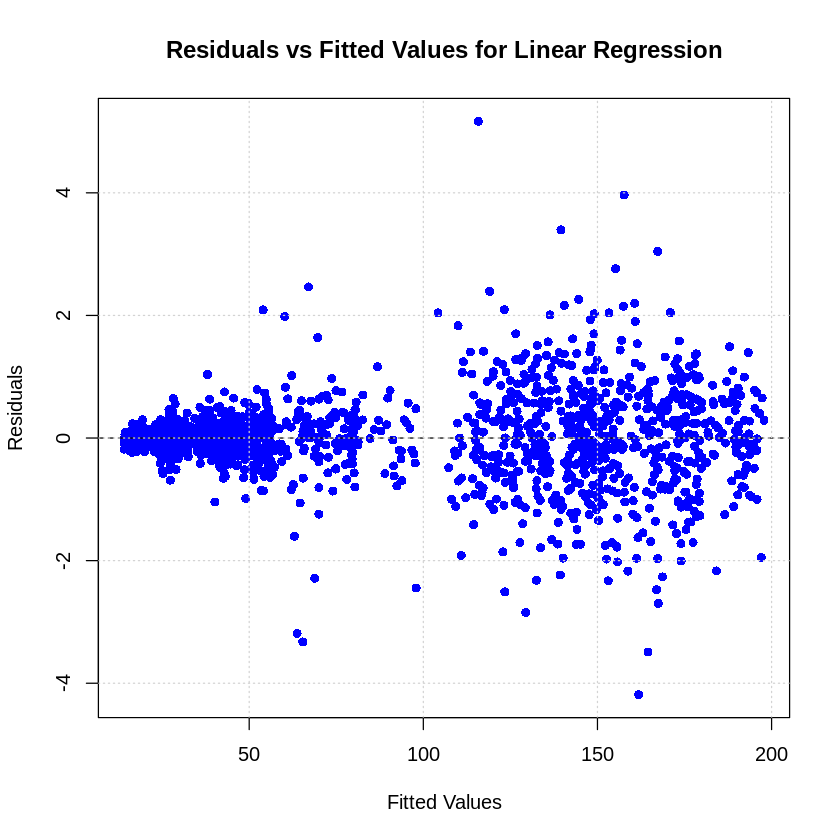

In [ ]:
fitted_values <- predict(lm_model)
residuals <- resid(lm_model)
dates <- X_train$date  # Assuming you have a variable 'date' in your training data

# Plotting the residuals vs. fitted values
plot(fitted_values, residuals, col = "blue", pch = 16, xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values for Linear Regression")

# Adding date names as points
text(fitted_values, residuals, labels = dates, pos = 1, cex = 0.6)

# Adding a horizontal line at y=0 for reference
abline(h = 0, col = "black", lty = 2)

# Adding grid lines
grid()

In [ ]:
predictions <- predict(lm_model, newdata = X_test)

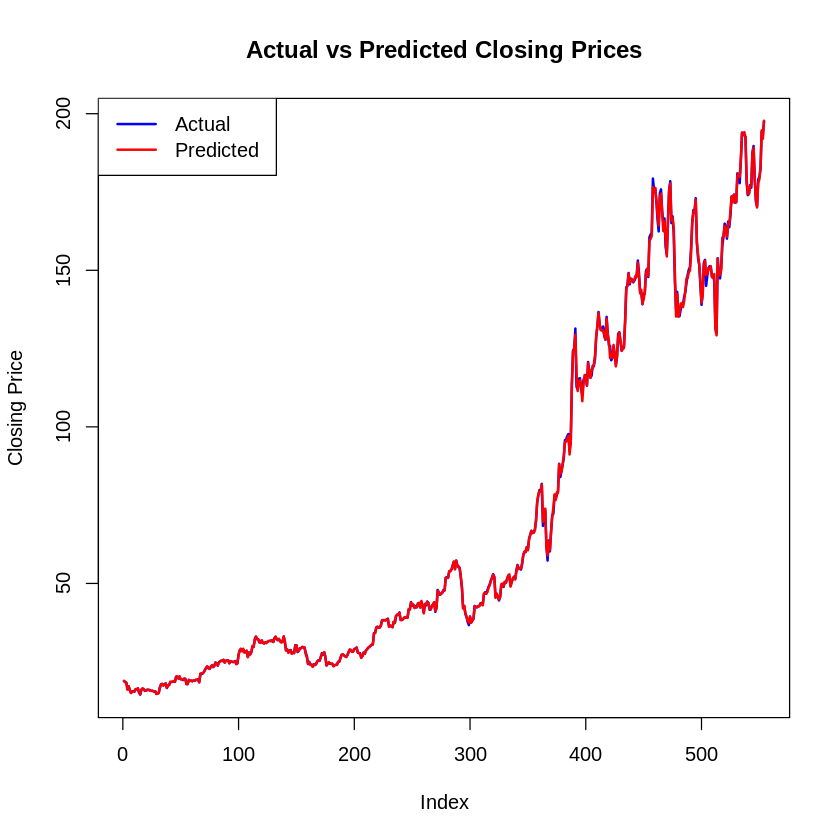

In [ ]:
# Create a sequence of indices
indices <- seq_along(y_test)

# Create a data frame with indices, actual, and predicted closing prices
plot_data <- data.frame(Index = indices,
                        Actual_Closing_Price = y_test,
                        Predicted_Closing_Price = predictions)

# Plot the graph
plot(plot_data$Index, plot_data$Actual_Closing_Price,
     type = "l", col = "blue", lwd = 2,
     xlab = "Index", ylab = "Closing Price",
     main = "Actual vs Predicted Closing Prices")
lines(plot_data$Index, plot_data$Predicted_Closing_Price,
      type = "l", col = "red", lwd = 2)
legend("topleft", legend = c("Actual", "Predicted"),
       col = c("blue", "red"), lwd = 2)

# Add a legend and customize the plot as needed


Ridge Regression

In [ ]:
library(caret)

# Define lambda_grid
lambda_grid <- seq(0, 1, by = 0.1)

# Ridge regression with grid search
ridge_model <- train(
  x = X_train,
  y = y_train,
  method = "ridge",
  trControl = trainControl(method = "cv", number = 10),
  tuneGrid = expand.grid(lambda = lambda_grid))

# Print model results
print(ridge_model)

Ridge Regression 

2214 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1993, 1992, 1993, 1994, 1994, 1992, ... 
Resampling results across tuning parameters:

  lambda  RMSE        Rsquared   MAE       
  0.0      0.5854166  0.9998922   0.3392791
  0.1      3.7679287  0.9997318   3.2612445
  0.2      7.1367911  0.9997316   6.2848001
  0.3     10.3346389  0.9997315   9.1332935
  0.4     13.3526265  0.9997315  11.8159214
  0.5     16.2013769  0.9997315  14.3456149
  0.6     18.8934275  0.9997315  16.7352895
  0.7     21.4408285  0.9997315  18.9961073
  0.8     23.8546806  0.9997315  21.1379361
  0.9     26.1450842  0.9997315  23.1699729
  1.0     28.3211969  0.9997315  25.1004009

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 0.


In [ ]:
coefficients <- coef(ridge_model$finalModel)

# Print the coefficients
print(coefficients)

NULL


In [ ]:
predictions <- predict(ridge_model, newdata = X_test)

# Print the predictions
print(predictions)

In [ ]:
R_squared <- cor(predictions, y_test)^2

# Calculate Mean Squared Error (MSE)
MSE <- mean((predictions - y_test)^2)

# Print R-squared and MSE
cat("R-squared:", R_squared, "\n")
cat("Mean Squared Error:", MSE, "\n")

R-squared: 0.9998659 
Mean Squared Error: 0.4119045 


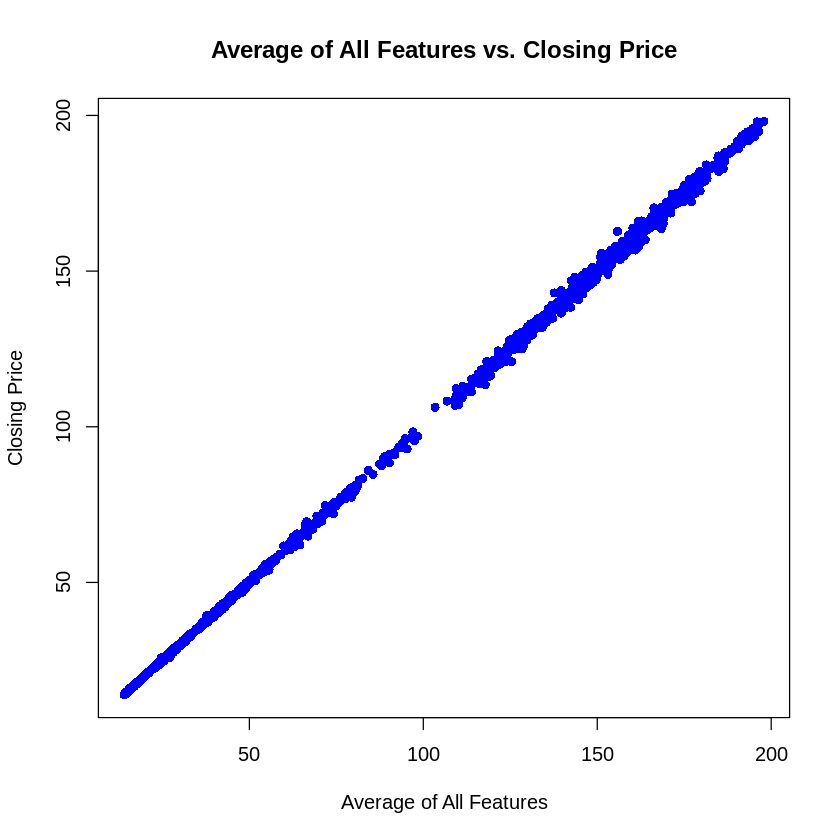

In [ ]:
average_features <- rowMeans(X_train)

# Create a data frame with average features and closing price
data <- data.frame(Average_Features = average_features, Closing_Price = y_train)

# Plot the graph
plot(data$Average_Features, data$Closing_Price,
     xlab = "Average of All Features", ylab = "Closing Price",
     main = "Average of All Features vs. Closing Price",
     col = "blue", pch = 16)

In [ ]:
prediction_table <- data.frame(Actual_Closing_Price = y_test, Predicted_Closing_Price = predictions)

# Print the table
print(prediction_table)

Vlume Prediction

In [ ]:
# Get Microsoft stock data
aapl_data <- AAPL[, c("AAPL.Open", "AAPL.High", "AAPL.Low", "AAPL.Close","AAPL.Volume")]

# Remove NA rows
aapl_df <- na.omit(aapl_data)


# Print the structure

In [ ]:
# Load necessary libraries
library(quantmod)
#library(caret)

# Convert msft to a data frame
aapl_df <- na.omit(aapl_df)
y <- aapl_df$AAPL.Volume

# Define X as predictors
X <- aapl_df[, c("AAPL.Open", "AAPL.High", "AAPL.Low")]
X <- data.frame(X)
y <- data.frame(y)


In [ ]:
#y <- as.numeric(y)

set.seed(123)  # for reproducibility
train_ratio <- 0.8
train_size <- round(train_ratio * nrow(X))
train_index <- sample(seq_len(nrow(X)), size = train_size)

# Train data
X_train <- X[train_index, ]
#print(X_train)
y_train <- y[train_index,]
#print(y_train)

# Test data
X_test <- X[-train_index, ]
y_test <- y[-train_index,]


In [ ]:
install.packages("elasticnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lars’




Linear Regression

In [ ]:
library(caret)

# Multiple linear regression without tuning
lm_model <- train(
  x = X_train,
  y = y_train,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10))

# Print model results
print(lm_model)

Linear Regression 

2214 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1993, 1994, 1993, 1994, 1991, 1992, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  104162425  0.3024233  67648888

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
predictions <- predict(lm_model, newdata = X_test)

In [ ]:
R_squared <- cor(predictions, y_test)^2

# Calculate Mean Squared Error (MSE)
MSE <- mean((predictions - y_test)^2)

# Print R-squared and MSE
cat("R-squared:", R_squared, "\n")
cat("Mean Squared Error:", MSE, "\n")

R-squared: 0.3072158 
Mean Squared Error: 9.678516e+15 


Residuals

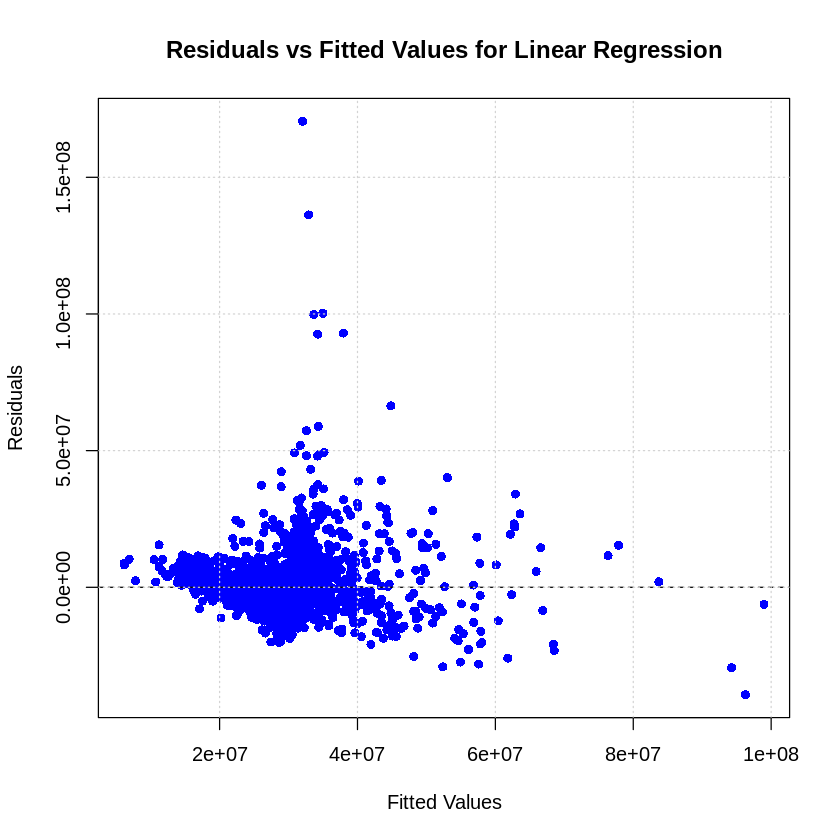

In [ ]:
fitted_values <- predict(lm_model)
residuals <- resid(lm_model)
dates <- X_train$date  # Assuming you have a variable 'date' in your training data

# Plotting the residuals vs. fitted values
plot(fitted_values, residuals, col = "blue", pch = 16, xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values for Linear Regression")

# Adding date names as points
text(fitted_values, residuals, labels = dates, pos = 1, cex = 0.6)

# Adding a horizontal line at y=0 for reference
abline(h = 0, col = "black", lty = 2)

# Adding grid lines
grid()

In [ ]:
msft_df$

           MSFT.Open MSFT.High MSFT.Low MSFT.Close MSFT.Volume
2014-01-02     37.35     37.40    37.10      37.16    30632200
2014-01-03     37.20     37.22    36.60      36.91    31134800
2014-01-06     36.85     36.89    36.11      36.13    43603700
2014-01-07     36.33     36.49    36.21      36.41    35802800
2014-01-08     36.00     36.14    35.58      35.76    59971700
2014-01-09     35.88     35.91    35.40      35.53    36516300
2014-01-10     35.90     36.15    35.75      36.04    40548800
2014-01-13     35.99     36.02    34.83      34.98    45901900
2014-01-14     34.73     35.88    34.63      35.78    41623300
2014-01-15     35.90     36.79    35.85      36.76    44812600
       ...                                                    
2023-12-15    366.85    372.40   366.28     370.73    78478200
2023-12-18    369.45    373.00   368.68     372.65    21802900
2023-12-19    371.49    373.26   369.84     373.26    20603700
2023-12-20    375.00    376.03   370.53     370.62    2

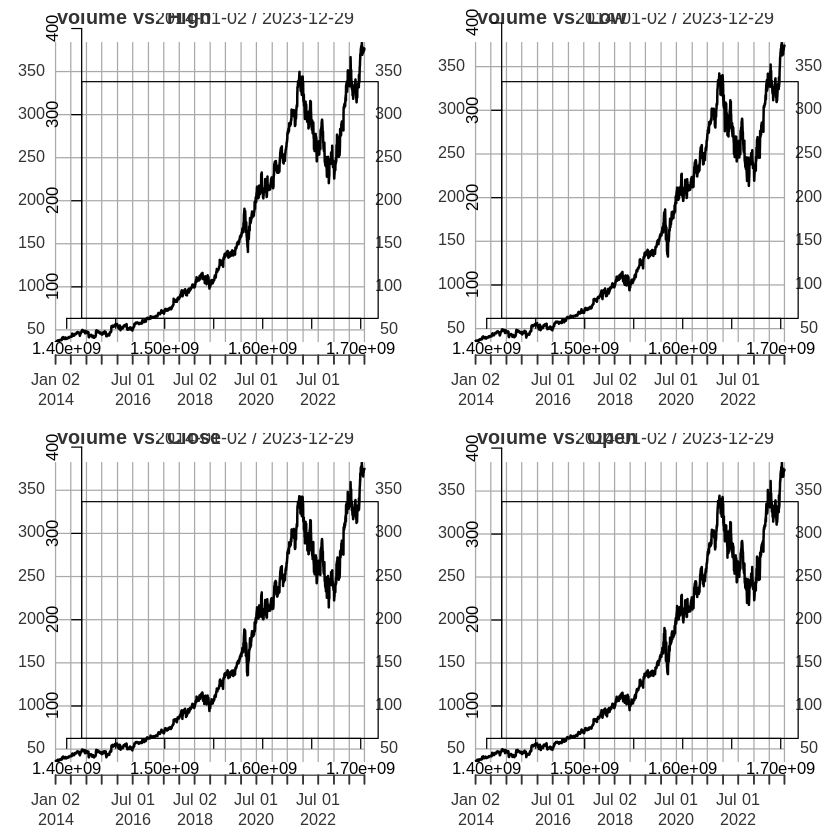

In [ ]:
# Set up a 2x2 grid for plotting
par(mfrow = c(2, 2))

# Plot volume vs. high
plot(msft_df[,2], msft_df[,5], xlab = "", ylab = "", main = "Volume vs. High", axes = FALSE)
axis(1, labels = NULL)  # Remove x-axis labels
axis(2, labels = NULL)  # Remove y-axis labels
box()  # Add box around plot

# Plot volume vs. low
plot(msft_df[,3], msft_df[,5], xlab = "", ylab = "", main = "Volume vs. Low", axes = FALSE)
axis(1, labels = NULL)
axis(2, labels = NULL)
box()

# Plot volume vs. close
plot(msft_df[,4], msft_df[,5], xlab = "", ylab = "", main = "Volume vs. Close", axes = FALSE)
axis(1, labels = NULL)
axis(2, labels = NULL)
box()

# Plot volume vs. open
plot(msft_df[,1], msft_df[,5], xlab = "", ylab = "", main = "Volume vs. Open", axes = FALSE)
axis(1, labels = NULL)
axis(2, labels = NULL)
box()


Ridge Regression

In [ ]:
# Define the sequence of alpha values for the grid search
library(caret)

# Define lambda_grid
lambda_grid <- seq(0, 1, by = 0.1)

# Ridge regression with grid search
ridge_model <- train(
  x = X_train,
  y = y_train,
  method = "ridge",
  trControl = trainControl(method = "cv", number = 10),
  tuneGrid = expand.grid(lambda = lambda_grid))

# Print model results
print(ridge_model)

Ridge Regression 

2013 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1812, 1812, 1813, 1812, 1810, 1812, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared    MAE    
  0.0     11669124  0.32850494  7621099
  0.1     14017213  0.01231422  9419950
  0.2     14023113  0.01170199  9425393
  0.3     14026559  0.01150280  9428691
  0.4     14029654  0.01140414  9432035
  0.5     14032774  0.01134523  9435501
  0.6     14036019  0.01130609  9439177
  0.7     14039408  0.01127819  9442899
  0.8     14042936  0.01125729  9446915
  0.9     14046589  0.01124106  9451031
  1.0     14050351  0.01122809  9455430

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 0.


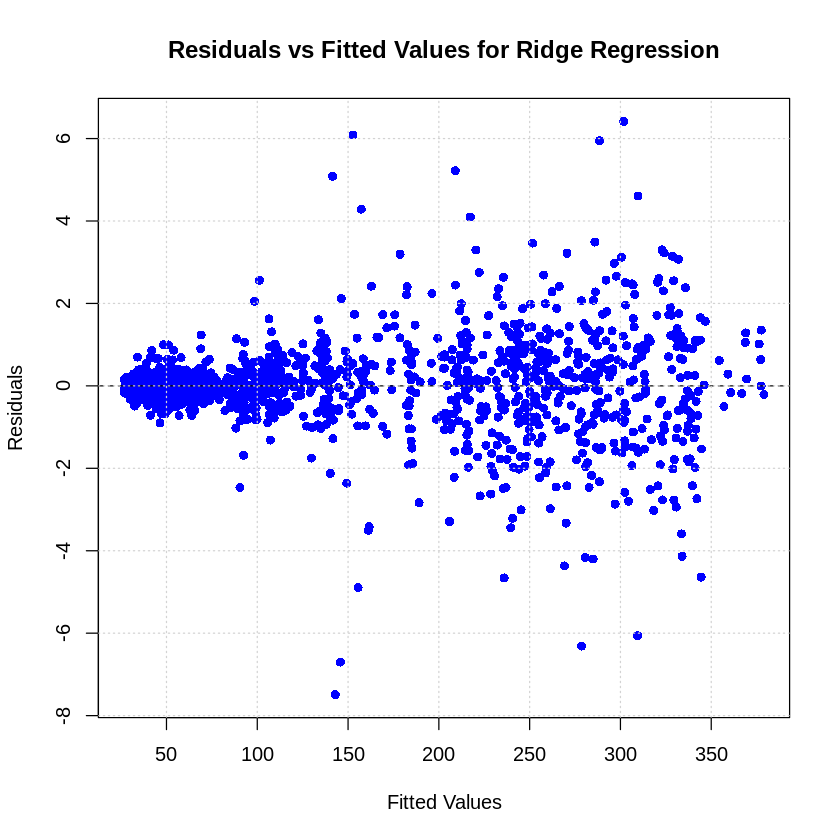

In [ ]:
fitted_values <- predict(ridge_model)
residuals <- resid(ridge_model)
dates <- X_train$date  # Assuming you have a variable 'date' in your training data

# Plotting the residuals vs. fitted values
plot(fitted_values, residuals, col = "blue", pch = 16, xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values for Ridge Regression")

# Adding date names as points
text(fitted_values, residuals, labels = dates, pos = 1, cex = 0.6)

# Adding a horizontal line at y=0 for reference
abline(h = 0, col = "black", lty = 2)

# Adding grid lines
grid()

In [ ]:
predicted_values <- fitted(model)
residuals <- y - predicted_values

# Assuming your data frame is named "df" and the date column is named "Date"
library(dplyr)
library(lubridate)

# Convert Date column to Date object
df$Date <- as.Date(df$Date)

# Calculate year from Date
df$Year <- year(df$Date)

# Combine residuals with the dataframe
df <- cbind(df, Residuals = residuals)

# Plot residuals for every year
df %>%
  group_by(Year) %>%
  ggplot(aes(x = Date, y = Residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  facet_wrap(~Year, scales = "free_x") +
  labs(title = "Residuals for Every Year", x = "Date", y = "Residuals")

ERROR: Error in eval(expr, envir, enclos): object 'dates_train' not found


In [ ]:
predictions <- predict(ridge_model, newdata = X_test)

# Calculate RMSE
rmse <- sqrt(mean((y_test - predictions)^2))

# Calculate R-squared
rsquared <- 1 - sum((y_test - predictions)^2) / sum((y_test - mean(y_test))^2)

# Print evaluation metrics
print(paste("RMSE:", rmse))
print(paste("R-squared:", rsquared))



[1] "RMSE: 1.08979340241322"
[1] "R-squared: 0.999881493596029"


In [ ]:
class(y_train)

[1] "xts" "zoo"

In [ ]:
ridge_model <- train(
  x = X[train_index, ],
  y = y[train_index],
  method = "ridge",
  trControl = trainControl(method = "cv"),
  preProcess = c("center", "scale")
)

# Print model results
print(ridge_model)

In [ ]:
getSymbols("MSFT", from = "2023-01-01", to = "2023-12-01")

# Extract adjusted closing prices
msft <- Cl(MSFT)

# Create lagged variables
#lags <- 5
#msft_lag <- embed(msft, lags + 1)[, lags:1]

# Prepare data
X <- msft[, -1]
y <- msft[, 1]

# Split data into training and testing sets
train_ratio <- 0.8
train_size <- round(train_ratio * nrow(X))
train_index <- seq_len(train_size)

# Ridge regression


[1] "MSFT"

Warning message in max(j, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


Ridge Regression

In [ ]:
col_names <- paste0("lag_", seq_len(lags))
colnames(X) <- col_names

ridge_model <- train(
  x = X[train_index, ],
  y = y[train_index],
  method = "ridge",
  trControl = trainControl(method = "cv"),
  preProcess = c("center", "scale")
)

# Lasso regression


# Print model results
print(ridge_model)
print(lasso_model)

Lasso Regression

In [ ]:
lasso_model <- train(
  x = X[train_index, ],
  y = y[train_index],
  method = "glmnet",
  trControl = trainControl(method = "cv"),
  preProcess = c("center", "scale"),
  tuneGrid = expand.grid(alpha = 1, lambda = seq(0.01, 1, by = 0.01))
)

In [ ]:
test_index <- setdiff(seq_len(nrow(X)), train_index)

# Use the indices to get the testing data
X_test <- X[test_index, ]
y_test <- y[test_index]

# Predict using Ridge regression
ridge_preds <- predict(ridge_model, newdata = X_test)

# Predict using Lasso regression
lasso_preds <- predict(lasso_model, newdata = X_test)

# Evaluate the models
ridge_rmse <- sqrt(mean((ridge_preds - y_test)^2))
lasso_rmse <- sqrt(mean((lasso_preds - y_test)^2))

# Print RMSE
cat("Ridge RMSE:", ridge_rmse, "\n")
cat("Lasso RMSE:", lasso_rmse, "\n")

In [ ]:
library(caret)
library(dplyr)
library(tidyverse)
library(ggplot2)

# Step 1: Web Scraping
# Define the start and end dates
start_date <- as.Date("2013-01-01")
end_date <- as.Date("2023-12-31")

# Convert the dates to POSIXct, then to Unix timestamps
start_date_timestamp <- as.numeric(as.POSIXct(start_date, origin = "1970-01-01", tz = "UTC"))
end_date_timestamp <- as.numeric(as.POSIXct(end_date, origin = "1970-01-01", tz = "UTC"))

# Create the Yahoo Finance API URL
url <- paste0('https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=',
              start_date_timestamp,
              '&period2=',
              end_date_timestamp,
              '&interval=1d&events=history')

# Define the destination file
destfile <- "AAPL.csv"

# Download the file
download.file(url, destfile, method = "auto")

# Step 2: Exploratory Data Analysis
# Load the data from the CSV file
data <- read.csv("AAPL.csv")

# Convert Date column to Date type
data$Date <- as.Date(data$Date, format = "%Y-%m-%d")

# Check structure and summary of the data
str(data)
summary(data)

'data.frame':	2768 obs. of  7 variables:
 $ Date     : Date, format: "2013-01-02" "2013-01-03" ...
 $ Open     : num  19.8 19.6 19.2 18.6 18.9 ...
 $ High     : num  19.8 19.6 19.2 18.9 19 ...
 $ Low      : num  19.3 19.3 18.8 18.4 18.6 ...
 $ Close    : num  19.6 19.4 18.8 18.7 18.8 ...
 $ Adj.Close: num  16.7 16.5 16.1 16 16 ...
 $ Volume   : int  560518000 352965200 594333600 484156400 458707200 407604400 601146000 350506800 734207600 876772400 ...


      Date                 Open             High             Low        
 Min.   :2013-01-02   Min.   : 13.86   Min.   : 14.27   Min.   : 13.75  
 1st Qu.:2015-09-30   1st Qu.: 27.57   1st Qu.: 27.93   1st Qu.: 27.30  
 Median :2018-06-30   Median : 43.84   Median : 44.31   Median : 43.62  
 Mean   :2018-07-01   Mean   : 72.31   Mean   : 73.09   Mean   : 71.57  
 3rd Qu.:2021-03-31   3rd Qu.:128.95   3rd Qu.:130.63   3rd Qu.:127.42  
 Max.   :2023-12-29   Max.   :198.02   Max.   :199.62   Max.   :197.00  
     Close          Adj.Close          Volume         
 Min.   : 13.95   Min.   : 11.98   Min.   :2.405e+07  
 1st Qu.: 27.59   1st Qu.: 25.15   1st Qu.:8.425e+07  
 Median : 43.96   Median : 41.86   Median :1.211e+08  
 Mean   : 72.36   Mean   : 70.31   Mean   :1.612e+08  
 3rd Qu.:129.61   3rd Qu.:127.49   3rd Qu.:1.958e+08  
 Max.   :198.11   Max.   :197.86   Max.   :1.461e+09  

##Volume

In [ ]:
library(quantmod)
#library(caret)

# Convert msft to a data frame
aapl_df <- na.omit(aapl_df)
y <- aapl_df$AAPL.Volume

# Define X as predictors
X <- aapl_df[, c("AAPL.Open", "AAPL.High", "AAPL.Low")]
X <- data.frame(X)
y <- data.frame(y)

In [ ]:
y

[1] "AAPL"

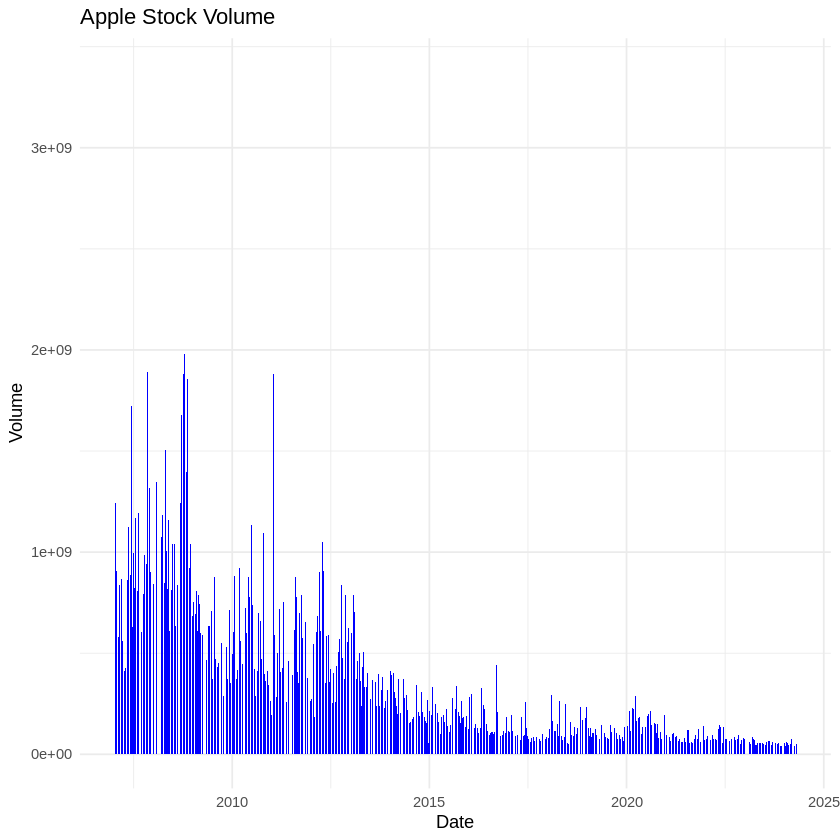

In [ ]:
getSymbols("AAPL", src = "yahoo")

# Extract volume data
volume_data <- as.data.frame(AAPL$AAPL.Volume)

# Convert row names (dates) to a column
volume_data$Date <- as.Date(rownames(volume_data))

# Plot volume data
ggplot(volume_data, aes(x = Date, y = AAPL.Volume)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Apple Stock Volume",
       x = "Date",
       y = "Volume") +
  theme_minimal()

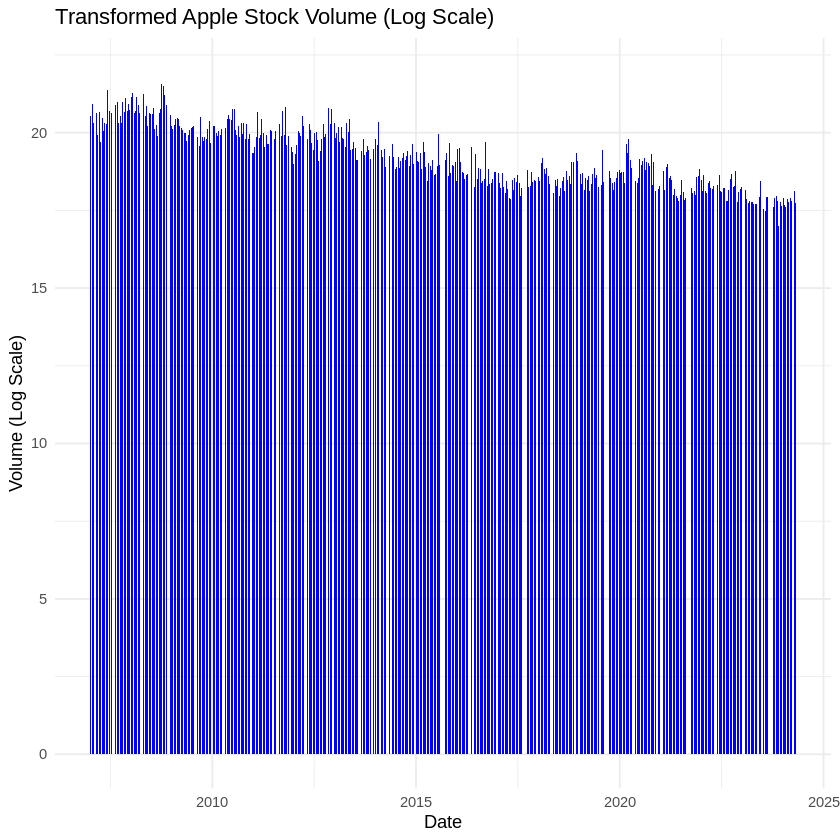

In [ ]:
volume_data$Volume_log <- log(volume_data$AAPL.Volume)

# Plot transformed volume data
ggplot(volume_data, aes(x = Date, y = Volume_log)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Transformed Apple Stock Volume (Log Scale)",
       x = "Date",
       y = "Volume (Log Scale)") +
  theme_minimal()

In [ ]:
library(caret)

In [ ]:
volume_data$Volume_transformed <- preProcess(data.frame(volume_data$AAPL.Volume), method = "YeoJohnson")$x


In [ ]:
preProcess(data.frame(volume_data$AAPL.Volume), method =c("center", "scale", "YeoJohnson"))

Created from 4358 samples and 1 variables

Pre-processing:
  - centered (1)
  - ignored (0)
  - scaled (1)
  - Yeo-Johnson transformation (1)

Lambda estimates for Yeo-Johnson transformation:
-0.15

In [ ]:
library(quantmod)
library(tidyr)
library(ggplot2)
library(caret)

# Fetch Apple stock data from Yahoo Finance
getSymbols("AAPL", src = "yahoo")

# Extract volume data and add Date column
volume_data <- data.frame(Date = index(AAPL), Volume = AAPL$AAPL.Volume)


[1] "AAPL"

In [ ]:
volumeDF <- data.frame(Volume =AAPL$AAPL.Volume)

In [ ]:

# Apply Yeo-Johnson transformation to volume data
transformer <- preProcess(data.frame(volumeDF), method = "YeoJohnson")
volume_data$Volume_transformed <- predict(transformer, newdata = volumeDF)

# Plot transformed volume data



In [ ]:
any(is.na(volume_data$Volume_transformed))

[1] FALSE

In [ ]:
volume_data$Date

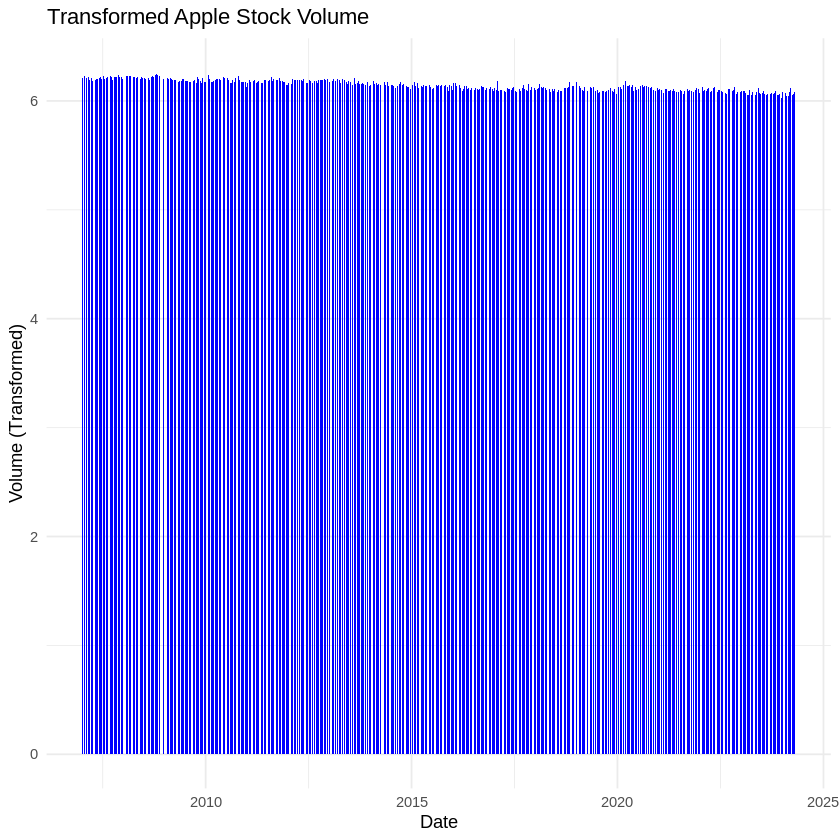

In [ ]:
ggplot(data = data.frame(Date = volume_data$Date, Volume_transformed = volume_data$Volume_transformed$AAPL.Volume), aes(x = Date)) +
  geom_col(aes(y = Volume_transformed), fill = "blue") +
  labs(title = "Transformed Apple Stock Volume",
       x = "Date",
       y = "Volume (Transformed)") +
  theme_minimal()

In [ ]:
volume_transformed = volume_data$Volume_transformed$AAPL.Volume

Linear Regression onf Transformed Data

In [ ]:
y <- volume_transformed

# Define X as predictors
X <- aapl_df[, c("AAPL.Open", "AAPL.High", "AAPL.Low","AAPL.Close")]
X <- data.frame(X)
y <- data.frame(y)

In [ ]:
set.seed(123)  # for reproducibility
train_ratio <- 0.8
train_size <- round(train_ratio * nrow(X))
train_index <- sample(seq_len(nrow(X)), size = train_size)

# Train data
X_train <- X[train_index, ]
#print(X_train)
y_train <- y[train_index,]
#print(y_train)

# Test data
X_test <- X[-train_index, ]
y_test <- y[-train_index,]

In [ ]:
y_train

In [ ]:
lm_model <- train(
  x = X_train,
  y = y_train,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10))

# Print model results
print(lm_model)

Linear Regression 

2214 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1993, 1994, 1993, 1994, 1992, 1992, ... 
Resampling results:

  RMSE        Rsquared  MAE       
  0.02058827  0.721279  0.01662961

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
coefficients <- coef(lm_model$finalModel)

# Print the coefficients
print(coefficients)

  (Intercept)     AAPL.Open     AAPL.High      AAPL.Low    AAPL.Close 
 6.212274e+00  1.160170e-03 -2.184069e-05 -1.000750e-03 -7.310656e-04 


In [ ]:
mean(volume_data$AAPL.Volume)

[1] 352088399

In [ ]:
mean(volume_data$APPL.Volume)

Warning message in mean.default(volume_data$APPL.Volume):
“argument is not numeric or logical: returning NA”


[1] NA

Standardization

In [ ]:
standardize_volume_data <- function() {
  # Calculate mean and standard deviation
  data = volume_data$AAPL.Volume
  mean_val <- mean(data)
  std_dev <- sd(data)

  # Apply standardization
  standardized_data <- (data - mean_val) / std_dev

  return(standardized_data)
}

# Standardize volume data for AAPL stock
standardized_AAPL_volume <- standardize_volume_data()

# Print standardized volume data
print(standardized_AAPL_volume)

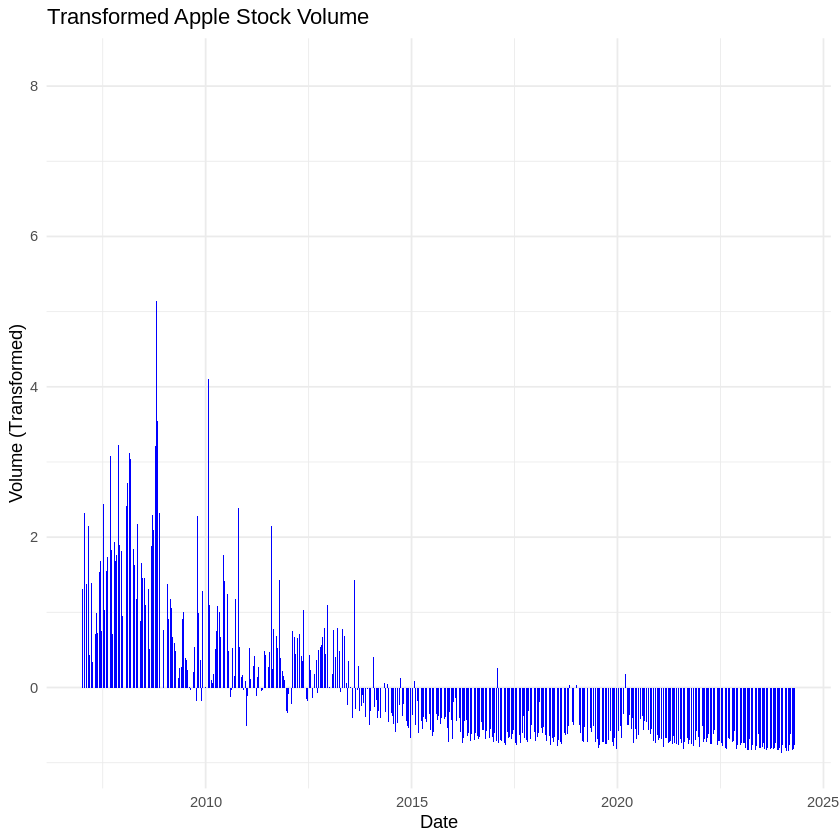

In [ ]:
ggplot(data = data.frame(Date = volume_data$Date, Volume_transformed = standardized_AAPL_volume), aes(x = Date)) +
  geom_col(aes(y = Volume_transformed), fill = "blue") +
  labs(title = "Transformed Apple Stock Volume",
       x = "Date",
       y = "Volume (Transformed)") +
  theme_minimal()

In [ ]:
y <- standardized_AAPL_volume

# Define X as predictors
X <- aapl_df[, c("AAPL.Open", "AAPL.High", "AAPL.Low","AAPL.Close")]
X <- data.frame(X)
y <- data.frame(y)

In [ ]:
set.seed(123)  # for reproducibility
train_ratio <- 0.8
train_size <- round(train_ratio * nrow(X))
train_index <- sample(seq_len(nrow(X)), size = train_size)

# Train data
X_train <- X[train_index, ]
#print(X_train)
y_train <- y[train_index,]
#print(y_train)

# Test data
X_test <- X[-train_index, ]
y_test <- y[-train_index,]

In [ ]:
lm_model <- train(
  x = X_train,
  y = y_train,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10))

# Print model results
print(lm_model)

Linear Regression 

2214 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1993, 1994, 1993, 1994, 1992, 1992, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.8042841  0.426521  0.5574505

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
coefficients <- coef(lm_model$finalModel)

# Print the coefficients
print(coefficients)

 (Intercept)    AAPL.Open    AAPL.High     AAPL.Low   AAPL.Close 
 1.260179853  0.007695553 -0.016937181  0.018613569 -0.021142966 


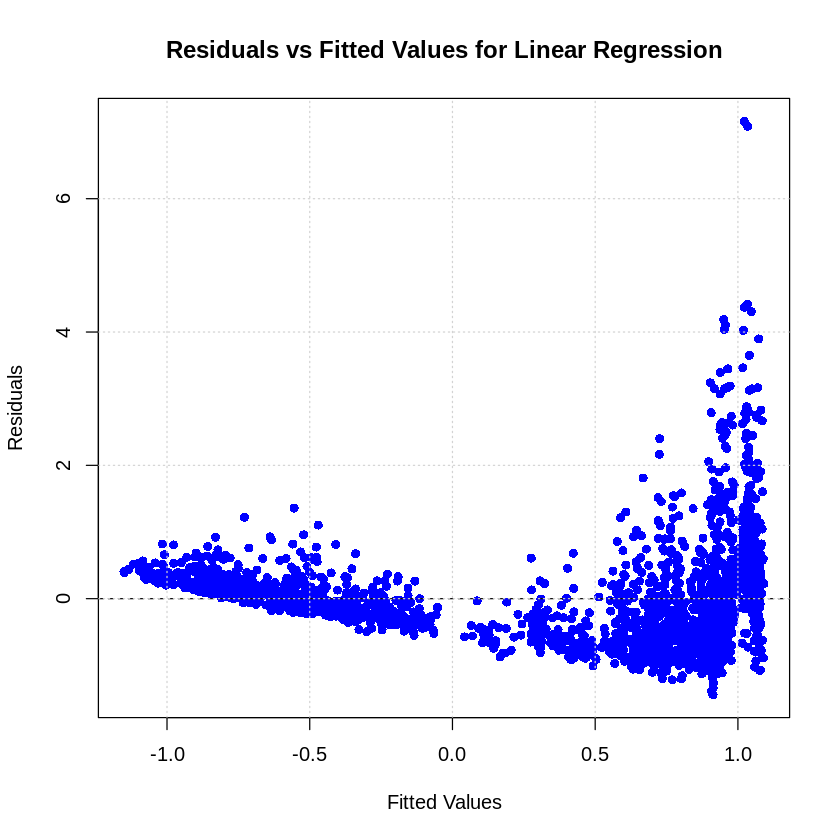

In [ ]:
fitted_values <- predict(lm_model)
residuals <- resid(lm_model)
dates <- X_train$date  # Assuming you have a variable 'date' in your training data

# Plotting the residuals vs. fitted values
plot(fitted_values, residuals, col = "blue", pch = 16, xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values for Linear Regression")

# Adding date names as points
text(fitted_values, residuals, labels = dates, pos = 1, cex = 0.6)

# Adding a horizontal line at y=0 for reference
abline(h = 0, col = "black", lty = 2)

# Adding grid lines
grid()

Divide my Moving Averages

In [ ]:
normalize_by_mean <- function(data) {
  mean_val <- mean(data)
  normalized_data <- data / mean_val
  return(normalized_data)
}

# Perform normalization by dividing whole data by its mean
normalized_volume_data <- normalize_by_mean(volume_data$AAPL.Volume)

# Print normalized volume data
print(normalized_volume_data)

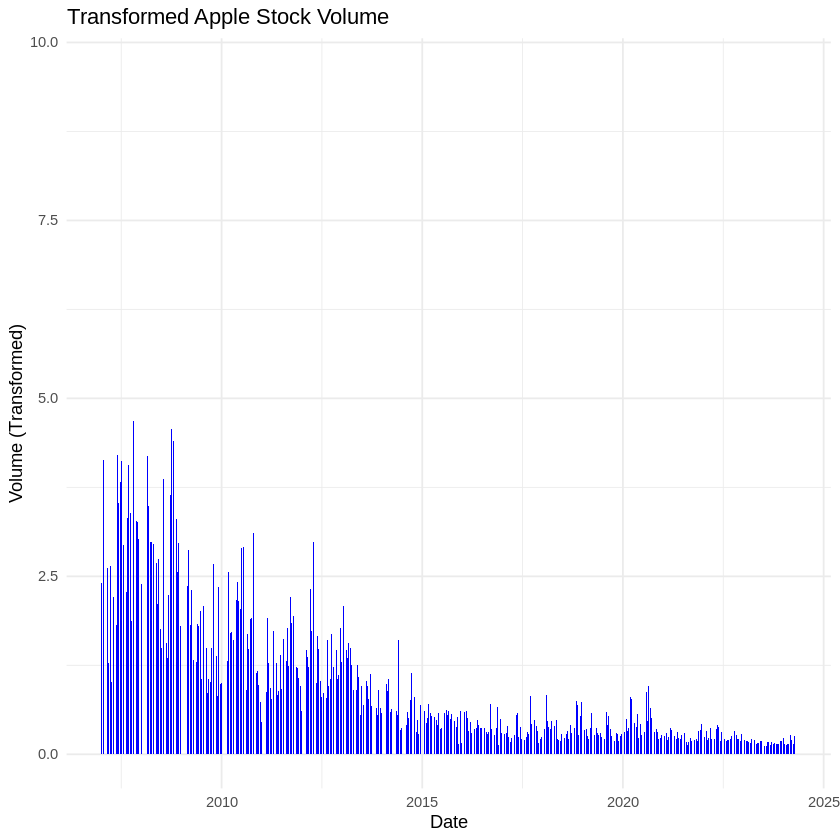

In [ ]:
ggplot(data = data.frame(Date = volume_data$Date, Volume_transformed = normalized_volume_data), aes(x = Date)) +
  geom_col(aes(y = Volume_transformed), fill = "blue") +
  labs(title = "Transformed Apple Stock Volume",
       x = "Date",
       y = "Volume (Transformed)") +
  theme_minimal()

In [ ]:
normalized_volume_data

In [ ]:
aapl_data <- AAPL[, c("AAPL.Open", "AAPL.High", "AAPL.Low", "AAPL.Close","AAPL.Volume")]

In [ ]:
X <- aapl_data[, c("AAPL.Open", "AAPL.High", "AAPL.Low"), drop = FALSE]  # Set drop = FALSE to prevent column dropping
X <- data.frame(X$AAPL.High,X$AAPL.Low,X$AAPL.Open)


In [ ]:
volume <- aapl_data$AAPL.Volume

# Calculate the mean of the volume column
mean_volume <- mean(volume)

# Divide volume by the mean
normalized_volume <- volume / mean_volume

# Convert normalized_volume to a data frame
y <- data.frame(normalized_volume)


In [ ]:
set.seed(123)  # for reproducibility
train_ratio <- 0.7
train_size <- round(train_ratio * nrow(X))
train_index <- sample(seq_len(nrow(X[])), size = train_size)

# Train data
X_train <- X[train_index, ]
#print(X_train)
y_train <- y[train_index,]
#print(y_train)

# Test data
X_test <- X[-train_index, ]
y_test <- y[-train_index,]

In [ ]:
nrow(X_test)

[1] 1307

Linear Regression

In [ ]:
library(caret)

# Multiple linear regression without tuning
lm_model <- train(
  x = X_train,
  y = y_train,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10))

# Print model results
print(lm_model)

Linear Regression 

3051 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2745, 2747, 2747, 2746, 2746, 2746, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8927491  0.2893428  0.6353299

Tuning parameter 'intercept' was held constant at a value of TRUE


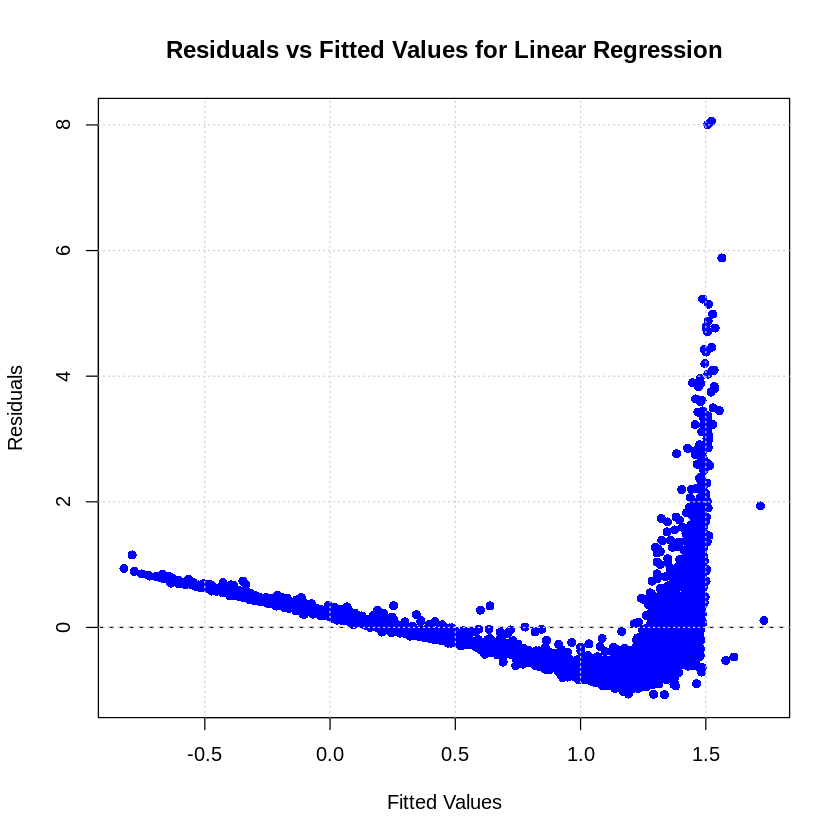

In [ ]:
fitted_values <- predict(lm_model)
residuals <- resid(lm_model)
dates <- X_train$date  # Assuming you have a variable 'date' in your training data

# Plotting the residuals vs. fitted values
plot(fitted_values, residuals, col = "blue", pch = 16, xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values for Linear Regression")

# Adding date names as points
text(fitted_values, residuals, labels = dates, pos = 1, cex = 0.6)

# Adding a horizontal line at y=0 for reference
abline(h = 0, col = "black", lty = 2)

# Adding grid lines
grid()

In [ ]:
predictions <- predict(lm_model, newdata = X_test)
R_squared <- cor(predictions, y_test)^2

# Calculate Mean Squared Error (MSE)
MSE <- mean((predictions - y_test)^2)

# Print R-squared and MSE
cat("R-squared:", R_squared, "\n")
cat("Mean Squared Error:", MSE, "\n")

R-squared: 0.2992338 
Mean Squared Error: 0.734776 


Non Linear Models on Averaged Data

Polynomial Regression of degree 2


In [ ]:
X_train_numeric <- sapply(X_train, function(x) {
  if (is.numeric(x)) {
    return(x)
  } else if (is.factor(x)) {
    return(as.numeric(as.character(x)))
  } else {
    return(NA)  # Or handle other non-numeric types appropriately
  }
})

# Remove rows with missing values
X_train_complete <- na.omit(X_train_numeric)

# Generate polynomial features of degree 2 for numeric predictor variables
X_train_poly <- cbind(X_train_complete, poly(X_train_complete, degree = 2))

# Polynomial regression of degree 2 without tuning
poly_model <- train(
  x = X_train_poly,
  y = y_train,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10)
)

# Print model results
print(poly_model)

Linear Regression 

3051 samples
  12 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2745, 2747, 2747, 2746, 2746, 2746, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.7149219  0.5449826  0.496604

Tuning parameter 'intercept' was held constant at a value of TRUE


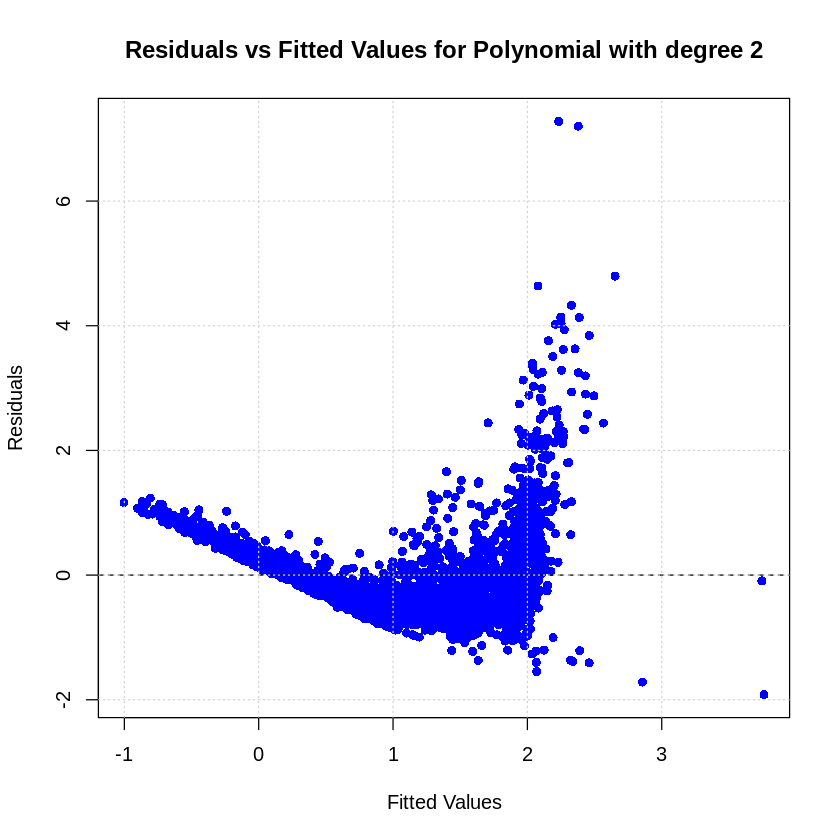

In [ ]:
fitted_values <- predict(poly_model)
residuals <- resid(poly_model)
dates <- X_train$date  # Assuming you have a variable 'date' in your training data

# Plotting the residuals vs. fitted values
plot(fitted_values, residuals, col = "blue", pch = 16, xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values for Polynomial with degree 2")

# Adding date names as points
text(fitted_values, residuals, labels = dates, pos = 1, cex = 0.6)

# Adding a horizontal line at y=0 for reference
abline(h = 0, col = "black", lty = 2)

# Adding grid lines
grid()

In [ ]:
# Assuming X_test is your test data

# Convert non-numeric columns to numeric if possible
X_test_numeric <- sapply(X_test, function(x) {
  if (is.numeric(x)) {
    return(x)
  } else if (is.factor(x)) {
    return(as.numeric(as.character(x)))
  } else {
    return(NA)  # Or handle other non-numeric types appropriately
  }
})

# Remove rows with missing values
X_test_complete <- na.omit(X_test_numeric)

# Generate polynomial features of degree 2 for numeric predictor variables
X_test_poly <- cbind(X_test_complete, poly(X_test_complete, degree = 2))

# Make predictions
predictions <- predict(poly_model, newdata = X_test_poly)




Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


In [ ]:
R_squared <- cor(predictions, y_test)^2

# Calculate Mean Squared Error (MSE)
MSE <- mean((predictions - y_test)^2)

# Print R-squared and MSE
cat("R-squared:", R_squared, "\n")
cat("Mean Squared Error:", MSE, "\n")

R-squared: 0.1272965 
Mean Squared Error: 253892.4 


Polynomial Regression of degree 3

In [ ]:
X_train_numeric <- sapply(X_train, function(x) {
  if (is.numeric(x)) {
    return(x)
  } else if (is.factor(x)) {
    return(as.numeric(as.character(x)))
  } else {
    return(NA)  # Or handle other non-numeric types appropriately
  }
})

# Remove rows with missing values
X_train_complete <- na.omit(X_train_numeric)

# Generate polynomial features of degree 2 for numeric predictor variables
X_train_poly <- cbind(X_train_complete, poly(X_train_complete, degree = 3))

# Polynomial regression of degree 2 without tuning
poly_model <- train(
  x = X_train_poly,
  y = y_train,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10)
)

# Print model results
print(poly_model)

Linear Regression 

3051 samples
  22 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2746, 2745, 2745, 2746, 2747, 2746, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6162028  0.6627332  0.4126271

Tuning parameter 'intercept' was held constant at a value of TRUE


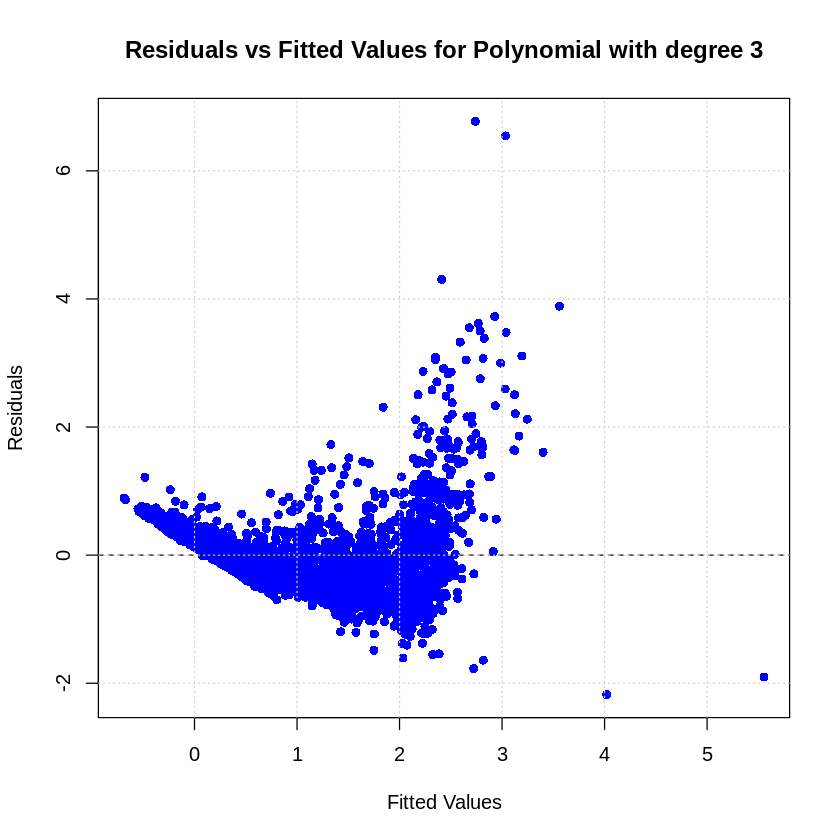

In [ ]:
fitted_values <- predict(poly_model)
residuals <- resid(poly_model)
dates <- X_train$date  # Assuming you have a variable 'date' in your training data

# Plotting the residuals vs. fitted values
plot(fitted_values, residuals, col = "blue", pch = 16, xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values for Polynomial with degree 3")

# Adding date names as points
text(fitted_values, residuals, labels = dates, pos = 1, cex = 0.6)

# Adding a horizontal line at y=0 for reference
abline(h = 0, col = "black", lty = 2)

# Adding grid lines
grid()

In [ ]:
X_test_numeric <- sapply(X_test, function(x) {
  if (is.numeric(x)) {
    return(x)
  } else if (is.factor(x)) {
    return(as.numeric(as.character(x)))
  } else {
    return(NA)  # Or handle other non-numeric types appropriately
  }
})

# Remove rows with missing values
X_test_complete <- na.omit(X_test_numeric)

# Generate polynomial features of degree 2 for numeric predictor variables
X_test_poly <- cbind(X_test_complete, poly(X_test_complete, degree = 3))

# Make predictions
predictions <- predict(poly_model, newdata = X_test_poly)


Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


In [ ]:
R_squared <- cor(predictions, y_test)^2

# Calculate Mean Squared Error (MSE)
MSE <- mean((predictions - y_test)^2)

# Print R-squared and MSE
cat("R-squared:", R_squared, "\n")
cat("Mean Squared Error:", MSE, "\n")

R-squared: 0.1986773 
Mean Squared Error: 290957377 


LSTM

In [ ]:
install.packages("keras")
library(keras)

# Assuming X_train and y_train are your training data

# Reshape input data for LSTM (assuming X_train is a matrix)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



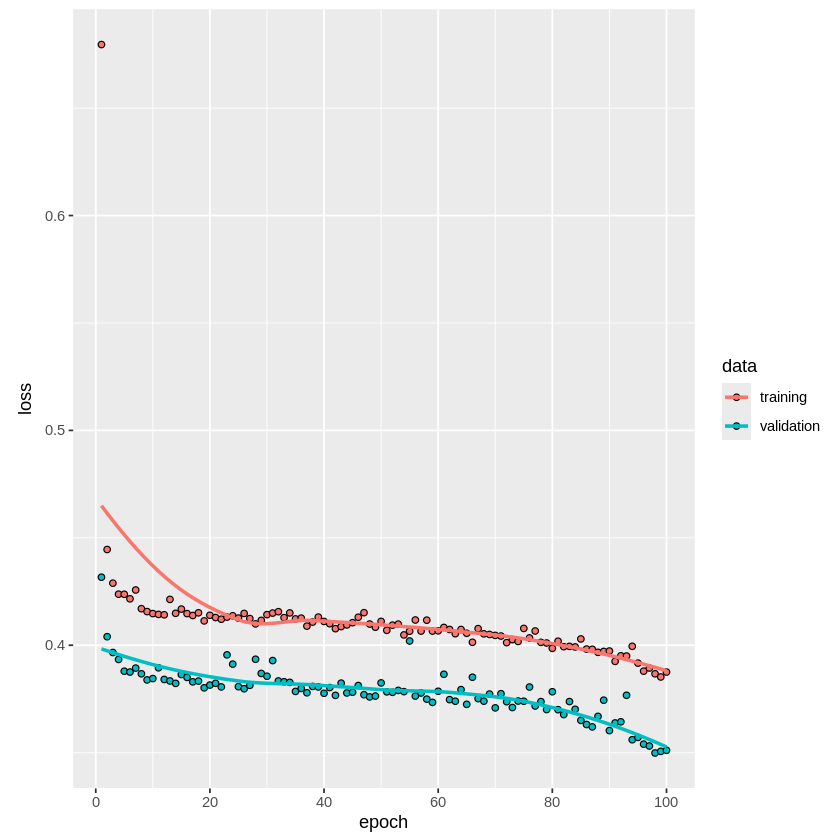

In [ ]:
# Define the LSTM model
model <- keras_model_sequential() %>%
  layer_lstm(units = 50, input_shape = c(dim(X_train_reshaped)[2], dim(X_train_reshaped)[3])) %>%
  #layer_lstm(units = 25) %>%
  layer_dense(units = 1)

# Compile the model
model %>% compile(
  loss = 'mean_squared_error',
  optimizer = optimizer_adam()
)

# Fit the model
history <- model %>% fit(
  X_train_reshaped, y_train,
  epochs = 100,
  batch_size = 32,
  validation_split = 0.2
)

# Plot training history
plot(history)

# Assuming X_test is your test data

# Reshape test data for prediction
X_test_reshaped <- array_reshape(X_test, c(dim(X_test)[1], dim(X_test)[2], 1))

# Make predictions
predictions <- model %>% predict(X_test_reshaped)


In [ ]:
R_squared <- cor(predictions, y_test)^2

# Print R-squared
print(R_squared)

          [,1]
[1,] 0.6529777


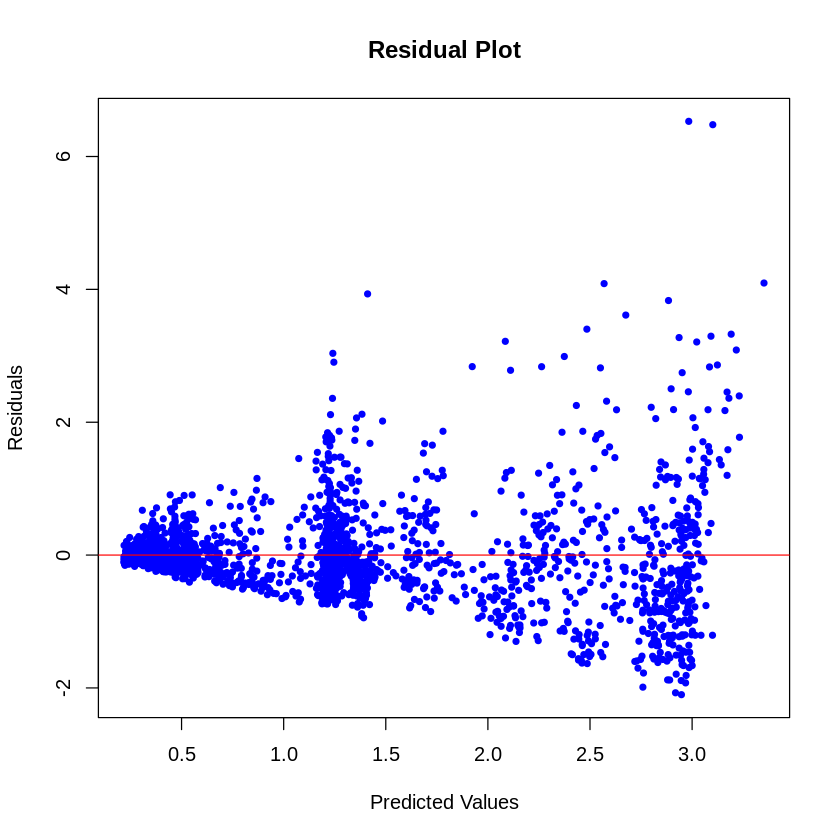

In [ ]:
predictions <- model %>% predict(X_train_reshaped)

# Calculate residuals
residuals <- y_train - predictions

# Plot residuals against predicted values
plot(predictions, residuals,
     xlab = "Predicted Values",
     ylab = "Residuals",
     main = "Residual Plot",
     col = "blue",
     pch = 20)
abline(h = 0, col = "red")